Importing librabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import mysql.connector
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

Database Connection

In [2]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",  # or use "127.0.0.1" if connecting locally
    user="root",  # MySQL username
    password="Suryakant@3",  # MySQL password
    database="retail_sales"  # Your database name
)

In [31]:
tables = pd.read_sql_query("SHOW TABLES;",conn)
print(tables)

  Tables_in_retail_sales
0           retail_sales


In [163]:
print(tables.columns)

for table in tables [tables.columns[0]]:
    display(pd.read_sql_query(f"select * from {table} limit 5", conn))

Index(['Tables_in_retail_sales'], dtype='object')


,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale
0,180,05-11-2022,10:47:00,117,Male,41,Clothing,3,300,129,900
1,522,09-07-2022,11:00:00,52,Male,46,Beauty,3,500,145,1500
2,559,12-12-2022,10:48:00,5,Female,40,Clothing,4,300,84,1200
3,1180,06-01-2022,08:53:00,85,Male,41,Clothing,3,300,129,900
4,1522,14-11-2022,08:35:00,48,Male,46,Beauty,3,500,235,1500


Data Analysis

In [33]:
pd.read_sql_query("select count(*) as total_sale from retail_sales", conn)

,total_sale
0,1987


In [34]:
pd.read_sql_query("Select count(distinct customer_id) as total_customers from retail_sales", conn)

,total_customers
0,155


In [64]:
pd.read_sql_query("Select  Round(avg(age), 2) as Avg_age from retail_sales", conn)

,Avg_age
0,41.35


In [65]:
pd.read_sql_query("Select* from retail_sales where total_sale > 1000", conn)

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale
0,522,09-07-2022,11:00:00,52,Male,46,Beauty,3,500,145,1500
1,559,12-12-2022,10:48:00,5,Female,40,Clothing,4,300,84,1200
2,1522,14-11-2022,08:35:00,48,Male,46,Beauty,3,500,235,1500
3,1559,20-08-2022,07:40:00,49,Female,40,Clothing,4,300,144,1200
4,421,08-04-2022,08:43:00,66,Female,37,Clothing,3,500,235,1500
...,...,...,...,...,...,...,...,...,...,...,...
301,908,30-10-2022,14:47:00,64,Male,46,Beauty,4,300,81,1200
302,1805,10-10-2023,13:35:00,79,Female,30,Beauty,3,500,225,1500
303,1908,17-12-2023,12:34:00,93,Male,46,Beauty,4,300,87,1200
304,211,12-09-2022,14:02:00,54,Male,42,Beauty,3,500,235,1500


In [35]:
pd.read_sql_query("Select distinct category from retail_sales", conn)

,category
0,Clothing
1,Beauty
2,Electronics


In [36]:
pd.read_sql_query("select * from retail_sales where sale_date = '05-11-2022'", conn)

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale
0,180,05-11-2022,10:47:00,117,Male,41,Clothing,3,300,129,900
1,240,05-11-2022,11:49:00,95,Female,23,Beauty,1,300,123,300
2,1256,05-11-2022,09:58:00,29,Male,23,Clothing,2,500,190,1000
3,1587,05-11-2022,20:06:00,140,Female,40,Beauty,4,300,105,1200
4,1819,05-11-2022,20:44:00,83,Female,35,Beauty,2,50,14,100
5,943,05-11-2022,19:29:00,90,Female,57,Clothing,4,300,318,1200
6,1896,05-11-2022,20:19:00,87,Female,30,Electronics,2,25,31,50
7,1137,05-11-2022,22:34:00,104,Male,46,Beauty,2,500,145,1000
8,856,05-11-2022,17:43:00,102,Male,54,Electronics,4,30,9,120
9,214,05-11-2022,16:31:00,53,Male,20,Beauty,2,30,8,60


In [164]:
# Fetch data from MySQL
df = pd.read_sql_query("SELECT category, SUM(total_sale) AS net_sales FROM retail_sales GROUP BY category", conn)

# Check the dataframe structure
print(df.head())
print(df.columns)

# Convert 'net_sales' column from float to int
df['net_sales'] = df['net_sales'].astype(int)

# Check the updated dataframe
print(df.head())
print(df.dtypes)


      category  net_sales
0     Clothing   309995.0
1       Beauty   286790.0
2  Electronics   311445.0
Index(['category', 'net_sales'], dtype='object')
      category  net_sales
0     Clothing     309995
1       Beauty     286790
2  Electronics     311445
category     object
net_sales     int32
dtype: object


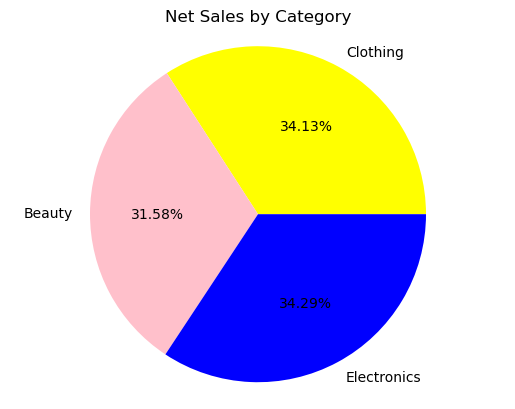

In [174]:
pd.read_sql_query("SELECT category, SUM(total_sale) AS net_sales FROM retail_sales GROUP BY category", conn)

# Create the pie chart
labels = df['category']
sizes = df['net_sales']
colors = ["yellow", "pink", "blue"]
plt.pie(sizes, colors=colors, labels=labels, autopct="%.2f%%")
plt.title("Net Sales by Category")  
plt.axis('equal')  
plt.show()  

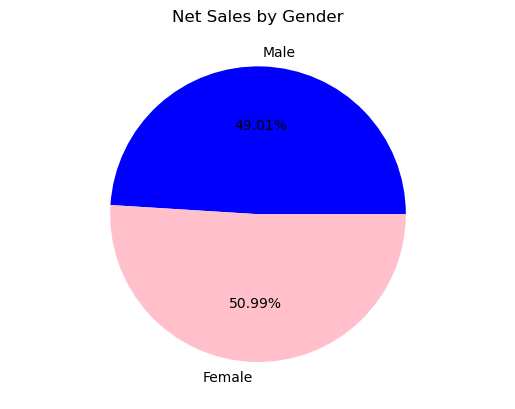

In [158]:
pd.read_sql_query(
    "SELECT gender, SUM(total_sale) as net_sales "
    "FROM retail_sales "
    "GROUP BY gender", 
    conn
)

# Create Pie chart 
labels = df['gender']
sizes = df['net_sales']
colors = ["blue", "pink"]  
plt.axis('equal')  
plt.title("Net Sales by Gender")
plt.pie(sizes, colors=colors, labels=labels, autopct="%.2f%%")
plt.show()

In [82]:
print(df.columns)

# Remove spaces from column names
df.columns = df.columns.str.strip()


Index(['category', 'gender', 'total_trans'], dtype='object')


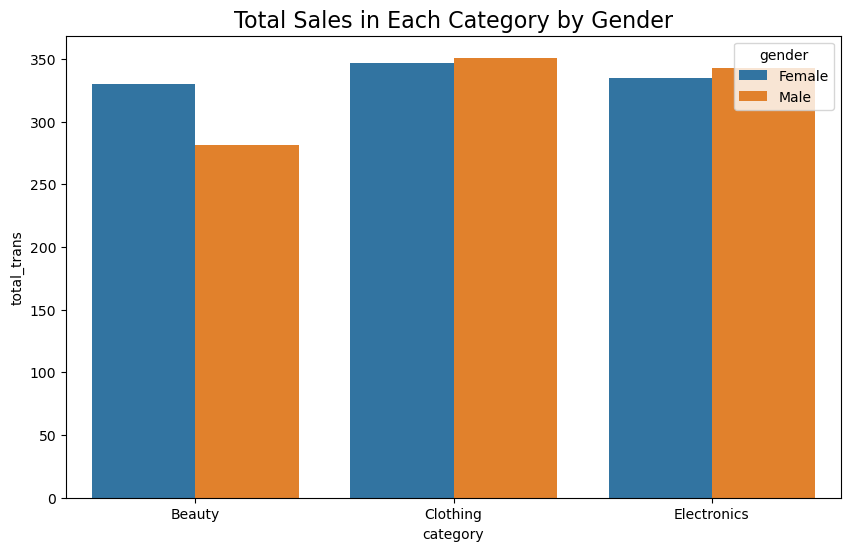

In [5]:
 pd.read_sql_query("SELECT category, gender, COUNT(*) AS total_trans FROM retail_sales GROUP BY category, gender ORDER BY category", conn)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Ensure plt.figure is correctly called
sns.barplot(data=df, x='category', y='total_trans', hue='gender')
plt.title('Total Sales in Each Category by Gender', fontsize=16)
plt.show()

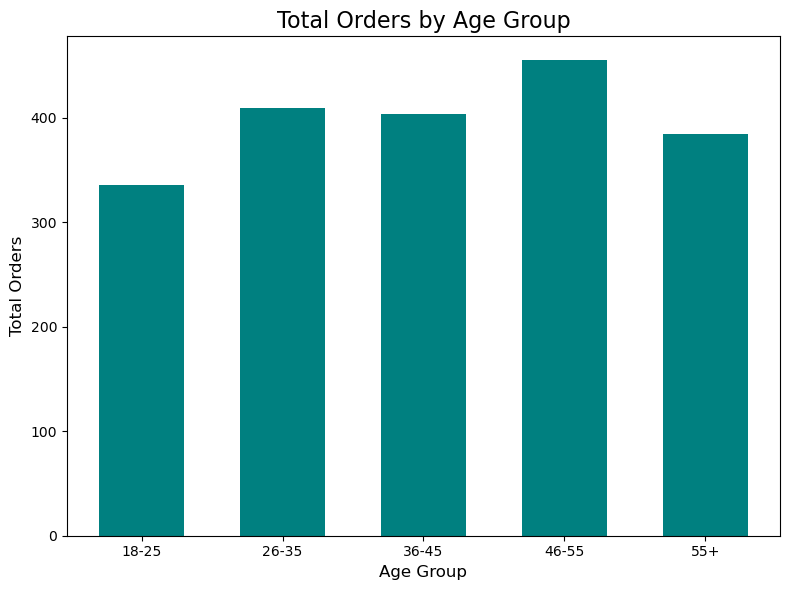

In [152]:
query = """
    WITH age_group_sales AS (
        SELECT *,
        CASE 
            WHEN age BETWEEN 18 AND 25 THEN '18-25'
            WHEN age BETWEEN 26 AND 35 THEN '26-35'
            WHEN age BETWEEN 36 AND 45 THEN '36-45'
            WHEN age BETWEEN 46 AND 55 THEN '46-55'
            WHEN age > 55 THEN '55+'
            ELSE 'Unknown'
        END AS age_group
        FROM retail_sales
    )
    SELECT age_group, COUNT(*) as total_orders
    FROM age_group_sales
    GROUP BY age_group
    ORDER BY age_group;
"""

df = pd.read_sql_query(query, conn)

# Create a bar plot for total orders by age group
plt.figure(figsize=(8, 6))
plt.bar(df['age_group'], df['total_orders'], color='teal', width=0.6)
plt.title('Total Orders by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=0)  # No rotation needed for simple age group labels
plt.tight_layout()
plt.show()

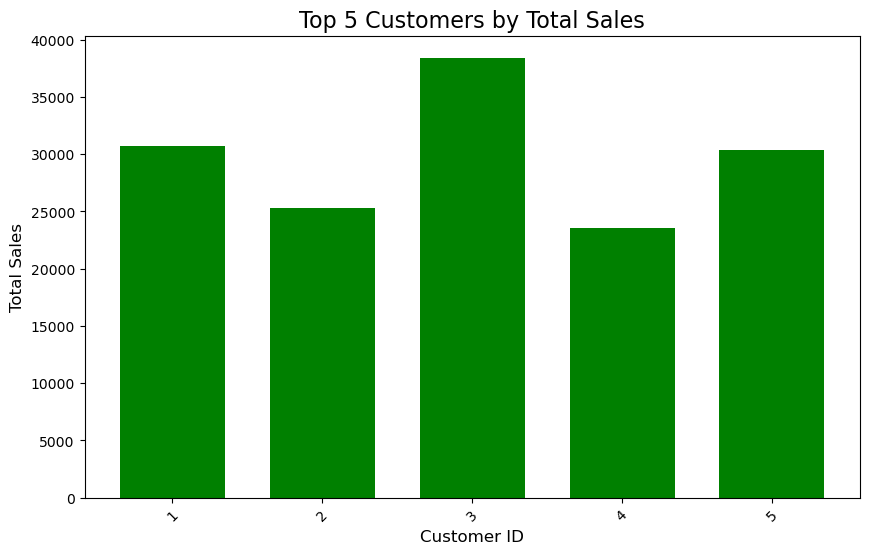

In [134]:
pd.read_sql_query("SELECT customer_id, sum(total_sale) as Total_sale from retail_sales group by 1 order by 2 desc limit 5", conn)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['customer_id'], df['Total_sale'], color='green', width=0.7)
plt.title('Top 5 Customers by Total Sales', fontsize=16)  
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  
plt.show()  


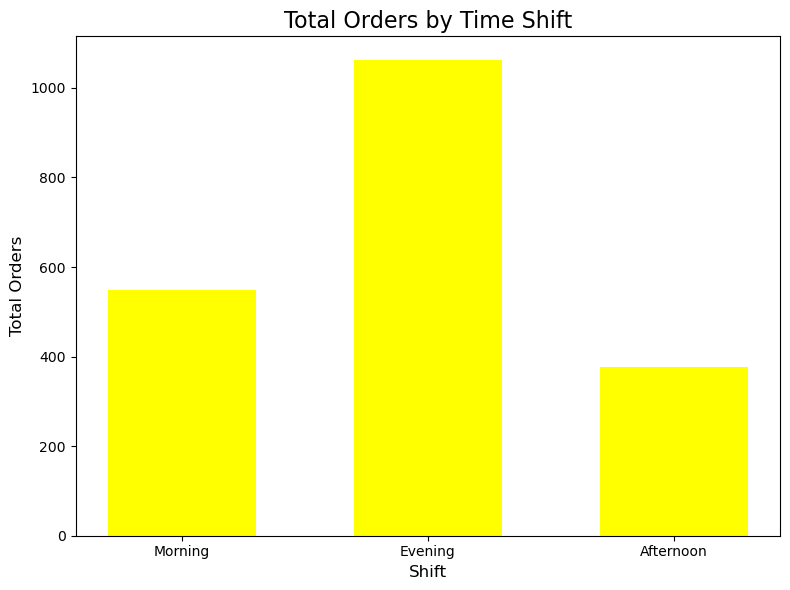

In [150]:
query = """
    WITH hourly_sale AS (
        SELECT *,
        CASE 
            WHEN EXTRACT(HOUR FROM sale_time) < 12 THEN 'Morning'
            WHEN EXTRACT(HOUR FROM sale_time) BETWEEN 12 AND 17 THEN 'Afternoon'
            ELSE 'Evening'
        END AS Shift
        FROM retail_sales
    )
    SELECT Shift, COUNT(*) as total_orders
    FROM hourly_sale
    GROUP BY Shift;
"""

# Execute the SQL query
df = pd.read_sql_query(query, conn)

# Create a bar plot for total orders by shift
plt.figure(figsize=(8, 6))
plt.bar(df['Shift'], df['total_orders'], color='yellow', width=0.6)
plt.title('Total Orders by Time Shift', fontsize=16)  
plt.xlabel('Shift', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=0)  # No rotation needed for simple shift labels
plt.tight_layout()
plt.show()
